## RF PatternTraces

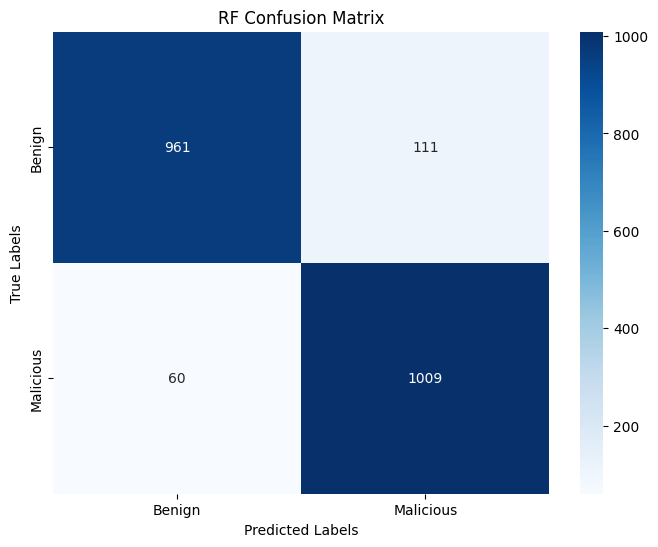

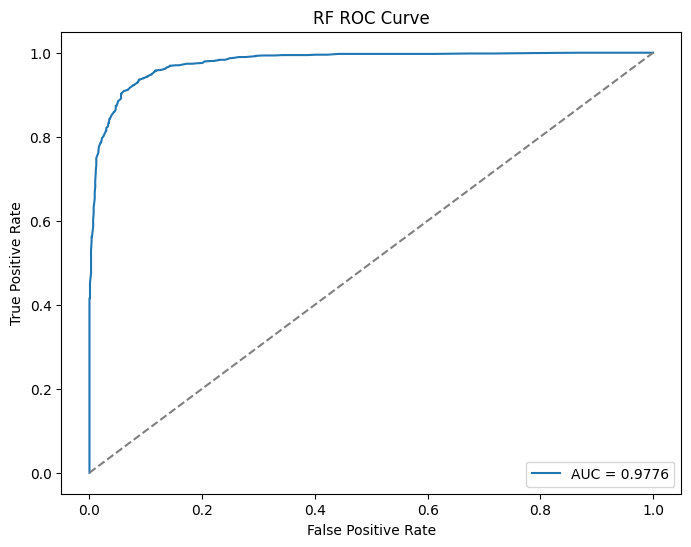

Train Accuracy: 0.99629593
Validation Accuracy: 0.92153199
Test Accuracy: 0.92013078
Precision: 0.92109173
Recall: 0.92013078
F1 Score: 0.92008810
ROC AUC: 0.97762328
Cohen's Kappa: 0.84027191
Training Time (s): 3.48769641
Validation Time (s): 0.08166265
Test Time (s): 0.06431603
Model saved at: RF_best_model_ngrams.pkl


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Top_5_By_Read',
                       'Top_5_By_Write',
                       'Top_5_By_R_Kb',
                       'Top_5_By_W_Kb',
                       'Top_5_By_File_Access'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model and record training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
rf_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
rf_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'RF_best_model_ngrams.pkl'
joblib.dump(rf_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('RF Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('RF ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RF ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## DT PatternTraces

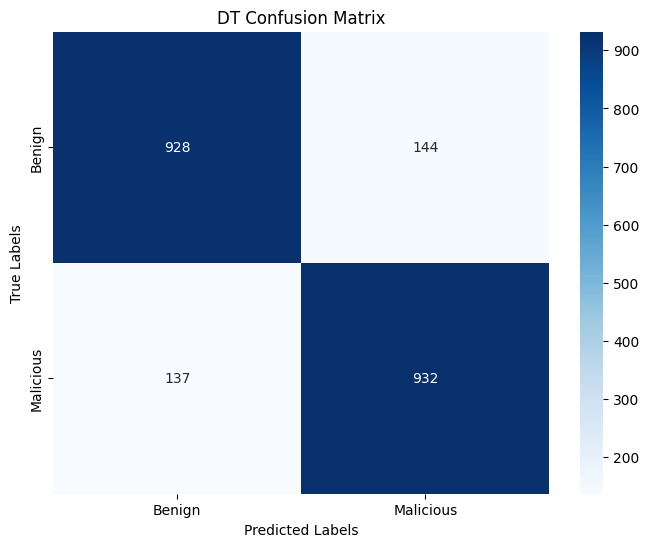

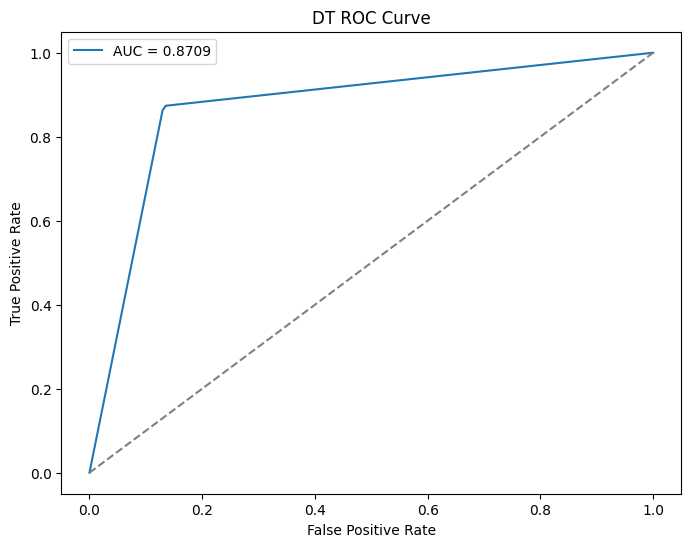

Train Accuracy: 0.99629593
Validation Accuracy: 0.87762728
Test Accuracy: 0.86875292
Precision: 0.86876989
Recall: 0.86875292
F1 Score: 0.86875212
ROC AUC: 0.87091219
Cohen's Kappa: 0.73750773
Training Time (s): 1.75406647
Validation Time (s): 0.00396538
Test Time (s): 0.00435662
Model saved at: DT_best_model_ngrams.pkl


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Top_5_By_Read',
                       'Top_5_By_Write',
                       'Top_5_By_R_Kb',
                       'Top_5_By_W_Kb',
                       'Top_5_By_File_Access'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
dt_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
dt_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'DT_best_model_ngrams.pkl'
joblib.dump(dt_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('DT Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('DT ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('DT ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## SVM PatternTraces

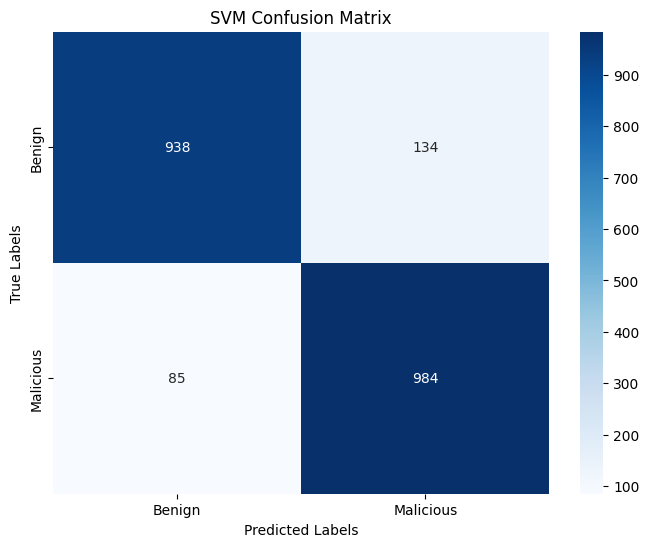

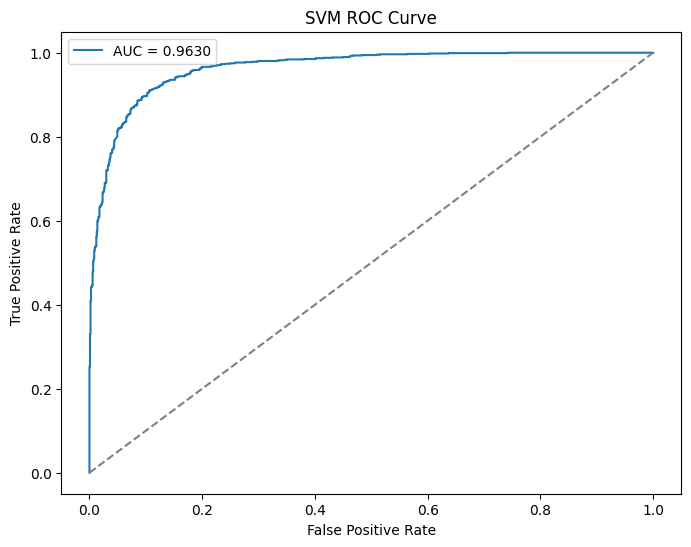

Train Accuracy: 0.95014516
Validation Accuracy: 0.90892106
Test Accuracy: 0.89771135
Precision: 0.89855284
Recall: 0.89771135
F1 Score: 0.89766103
ROC AUC: 0.96297235
Cohen's Kappa: 0.79543542
Training Time (s): 93.45007801
Validation Time (s): 2.32780695
Test Time (s): 1.94820690
Model saved at: SVM_best_model_ngrams.pkl


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Top_5_By_Read',
                       'Top_5_By_Write',
                       'Top_5_By_R_Kb',
                       'Top_5_By_W_Kb',
                       'Top_5_By_File_Access'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SVM model with probability=True for AUC/ROC calculations
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model and record training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = svm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
svm_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
svm_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'SVM_best_model_ngrams.pkl'
joblib.dump(svm_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('SVM Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('SVM ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## LR PatternTraces

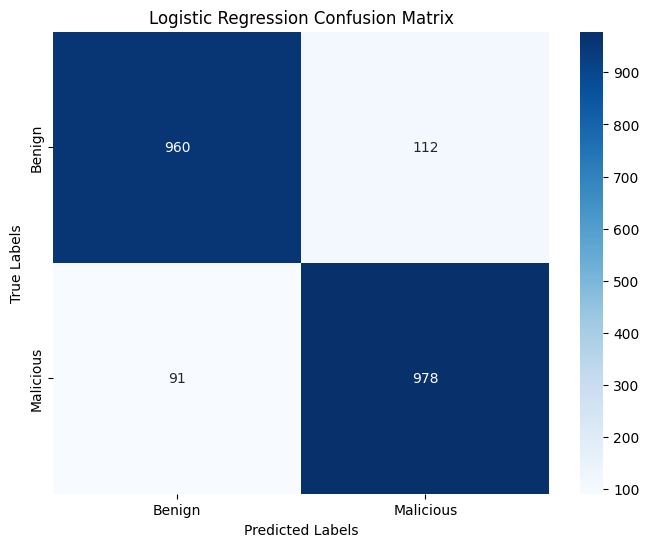

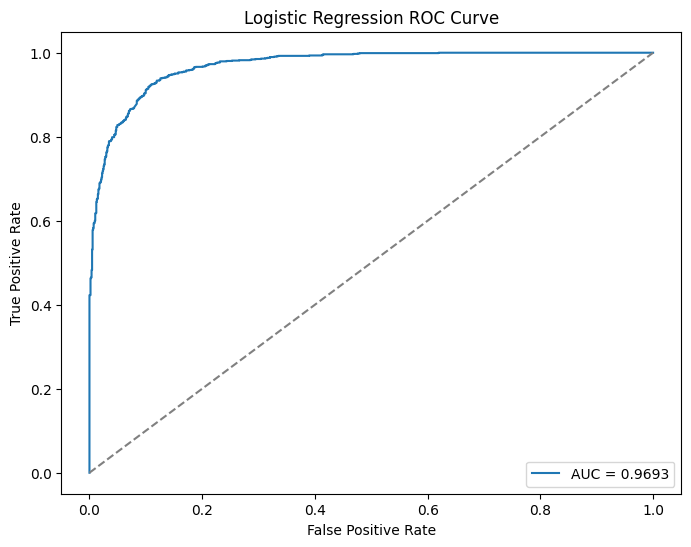

Train Accuracy: 0.94173591
Validation Accuracy: 0.91592714
Test Accuracy: 0.90518449
Precision: 0.90534308
Recall: 0.90518449
F1 Score: 0.90517667
ROC AUC: 0.96931284
Cohen's Kappa: 0.81037383
Training Time (s): 0.43270731
Validation Time (s): 0.00098658
Test Time (s): 0.00100303
Model saved at: LR_best_model_ngrams.pkl


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Top_5_By_Read',
                       'Top_5_By_Write',
                       'Top_5_By_R_Kb',
                       'Top_5_By_W_Kb',
                       'Top_5_By_File_Access'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model and record training time
start_train_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = lr_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
lr_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
lr_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'LR_best_model_ngrams.pkl'
joblib.dump(lr_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Logistic Regression Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic Regression ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## KNN Pattern Traces

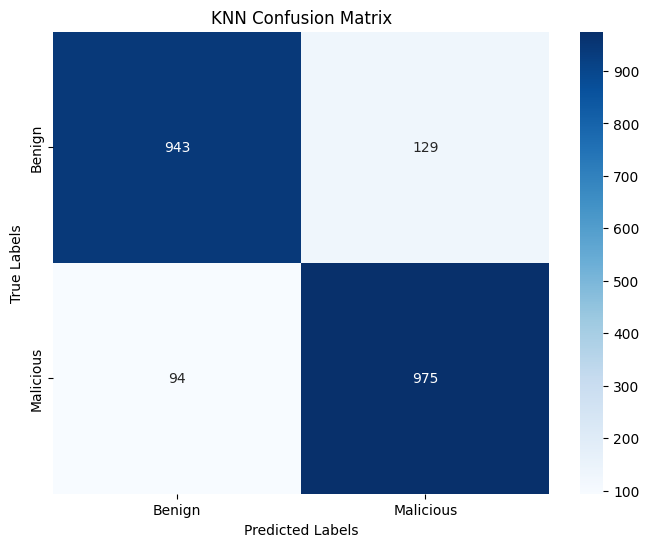

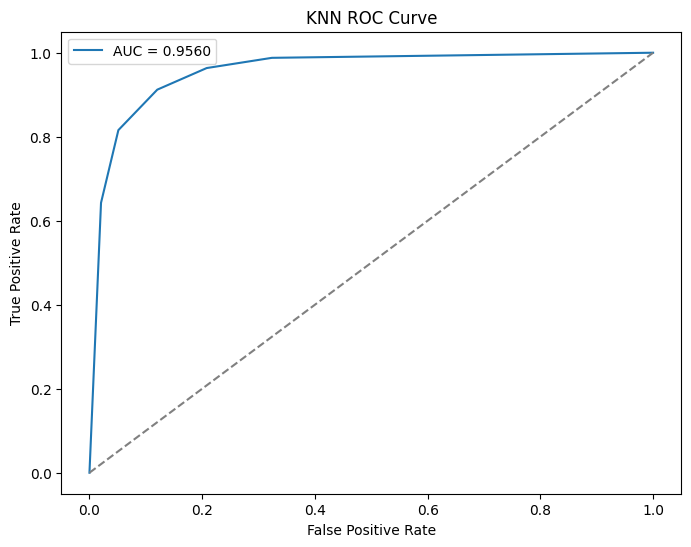

Train Accuracy: 0.93502853
Validation Accuracy: 0.89257356
Test Accuracy: 0.89584306
Precision: 0.89627140
Recall: 0.89584306
F1 Score: 0.89581761
ROC AUC: 0.95595950
Cohen's Kappa: 0.79169526
Training Time (s): 0.00303030
Validation Time (s): 1.15767217
Test Time (s): 1.14789391
Model saved at: KNN_best_model_ngrams.pkl


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Top_5_By_Read',
                       'Top_5_By_Write',
                       'Top_5_By_R_Kb',
                       'Top_5_By_W_Kb',
                       'Top_5_By_File_Access'
                      ]
# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model and record training time
start_train_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = knn_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
knn_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
knn_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'KNN_best_model_ngrams.pkl'
joblib.dump(knn_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('KNN Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('KNN ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## GB Pattern Traces

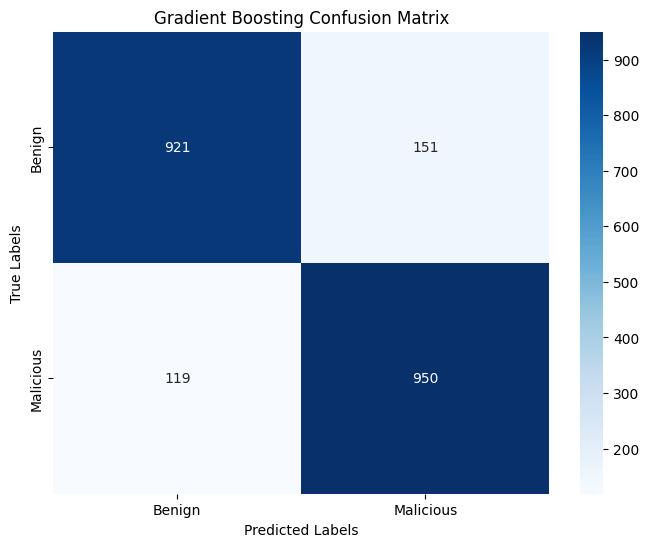

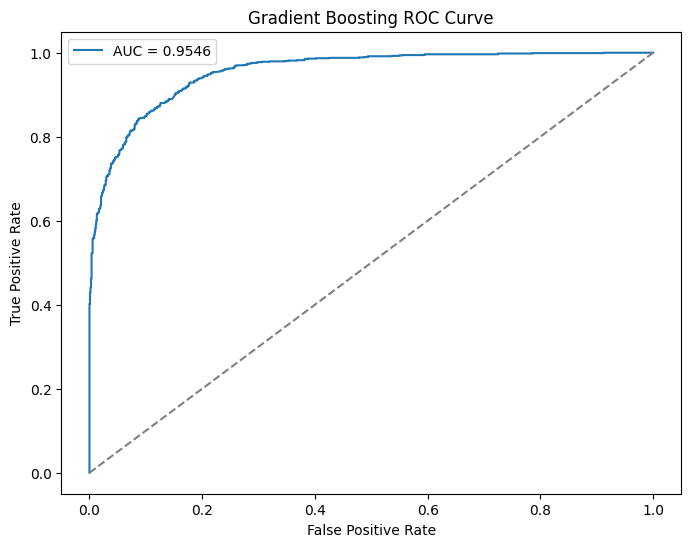

Train Accuracy: 0.88577435
Validation Accuracy: 0.87716021
Test Accuracy: 0.87389071
Precision: 0.87423036
Recall: 0.87389071
F1 Score: 0.87386517
ROC AUC: 0.95462919
Cohen's Kappa: 0.74779148
Training Time (s): 10.86434913
Validation Time (s): 0.00602078
Test Time (s): 0.01130843
Model saved at: GB_best_model_ngrams.pkl


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Top_5_By_Read',
                       'Top_5_By_Write',
                       'Top_5_By_R_Kb',
                       'Top_5_By_W_Kb',
                       'Top_5_By_File_Access'
                      ]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = gb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
gb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
gb_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'GB_best_model_ngrams.pkl'
joblib.dump(gb_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Gradient Boosting Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Gradient Boosting ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


In [18]:
# Updated metrics for new data
updated_metrics = {
     "Model": ["Random Forest", "Decision Tree", "SVM", "Logistic Regression", "KNN", "Gradient Boosting"],
    "Train Accuracy": [0.99629593, 0.99629593, 0.95014516, 0.94173591, 0.93502853, 0.88577435],
    "Validation Accuracy": [0.92153199, 0.87762728, 0.90892106, 0.91592714, 0.89257356, 0.87716021],
    "Test Accuracy": [0.92013078, 0.86875292, 0.89771135, 0.90518449, 0.89584306, 0.87389071],
    "Precision": [0.92109173, 0.86876989, 0.89855284, 0.90534308, 0.89627140, 0.87423036],
    "Recall": [0.92013078, 0.86875292, 0.89771135, 0.90518449, 0.89584306, 0.87389071],
    "F1 Score": [0.92008810, 0.86875212, 0.89766103, 0.90517667, 0.89581761, 0.87386517],
    "ROC AUC": [0.97762328, 0.87091219, 0.96297235, 0.96931284, 0.95595950, 0.95462919],
    "Cohen's Kappa": [0.84027191, 0.73750773, 0.79543542, 0.81037383, 0.79169526, 0.74779148],
    "Training Time (s)": [3.48769641, 1.75406647, 93.45007801, 0.43270731, 0.00303030, 10.86434913],
    "Validation Time (s)": [0.08166265, 0.00396538, 2.32780695, 0.00098658, 1.15767217, 0.00602078],
    "Test Time (s)": [0.06431603, 0.00435662, 1.94820690, 0.00100303, 1.14789391, 0.01130843],
}

# Convert the dictionary to a DataFrame
updated_results_df = pd.DataFrame(updated_metrics)

# Save the DataFrame to a CSV file
updated_csv_file_path = "model_comparison_results.csv"
updated_results_df.to_csv(updated_csv_file_path, index=False)
updated_results_df

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen's Kappa,Training Time (s),Validation Time (s),Test Time (s)
0,Random Forest,0.996296,0.921532,0.920131,0.921092,0.920131,0.920088,0.977623,0.840272,3.487696,0.081663,0.064316
1,Decision Tree,0.996296,0.877627,0.868753,0.868770,0.868753,0.868752,0.870912,0.737508,1.754066,0.003965,0.004357
2,SVM,0.950145,0.908921,0.897711,0.898553,0.897711,0.897661,0.962972,0.795435,93.450078,2.327807,1.948207
3,Logistic Regression,0.941736,0.915927,0.905184,0.905343,0.905184,0.905177,0.969313,0.810374,0.432707,0.000987,0.001003
4,KNN,0.935029,0.892574,0.895843,0.896271,0.895843,0.895818,0.955959,0.791695,0.003030,1.157672,1.147894
5,Gradient Boosting,0.885774,0.877160,0.873891,0.874230,0.873891,0.873865,0.954629,0.747791,10.864349,0.006021,0.011308


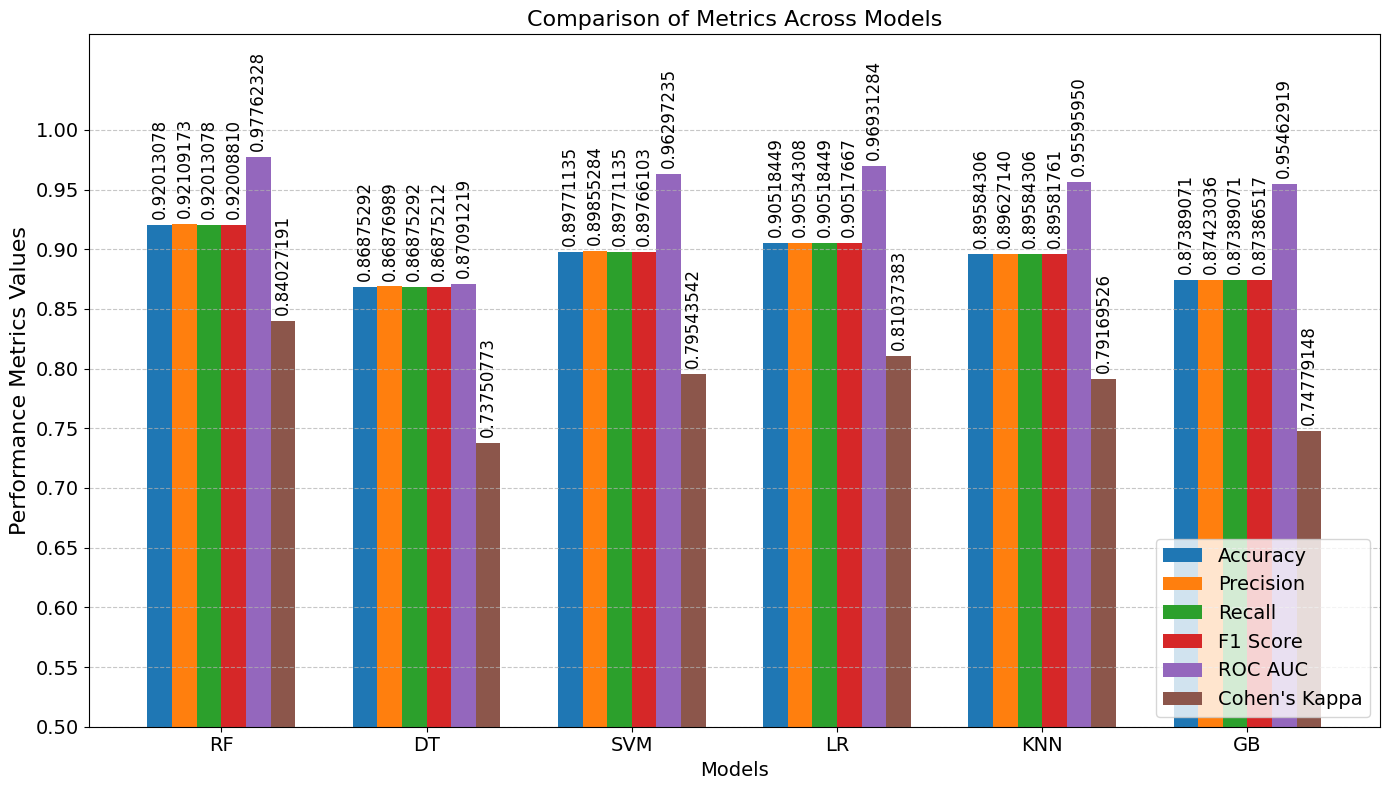

In [21]:
# Re-importing necessary libraries and re-defining the data
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    "Accuracy": [0.92013078, 0.86875292, 0.89771135, 0.90518449, 0.89584306, 0.87389071],
    "Precision": [0.92109173, 0.86876989, 0.89855284, 0.90534308, 0.89627140, 0.87423036],
    "Recall": [0.92013078, 0.86875292, 0.89771135, 0.90518449, 0.89584306, 0.87389071],
    "F1 Score": [0.92008810, 0.86875212, 0.89766103, 0.90517667, 0.89581761, 0.87386517],
    "ROC AUC": [0.97762328, 0.87091219, 0.96297235, 0.96931284, 0.95595950, 0.95462919],
    "Cohen's Kappa": [0.84027191, 0.73750773, 0.79543542, 0.81037383, 0.79169526, 0.74779148],
}
models = ["RF", "DT", "SVM", "LR", "KNN", "GB"]

# Bar width and positions
bar_width = 0.12
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * bar_width, values, bar_width, label=metric)
    # Adding numerical values to each bar (vertically)
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{value:.8f}", 
                ha='center', va='bottom', rotation=90, fontsize=12)

# Customizing the plot
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=0, fontsize=14)
ax.set_title("Comparison of Metrics Across Models", fontsize=16)
ax.set_ylabel("Performance Metrics Values", fontsize=16)  # Increased Y-axis font size
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc="lower right", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Setting the Y-axis to start from 0.5 with intervals of 0.05
ax.set_ylim(0.5, 1.08)
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
ax.tick_params(axis='y', labelsize=14)  # Y-axis tick font size set to 14

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Comparison of Metrics Across Models.png')  # Save the plot
plt.show()